# KNN classifier implementation in Python

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [98]:
from sklearn import datasets

In [99]:
df = pd.read_csv('/Users/sonu/Documents/aiml/assignments/c3/1/liver_disease_.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [100]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


### Column "Albumin_and_Globulin ratio has missing values. So imputing new values.

In [101]:
# finding row with missing values
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)
# The missing values are MCAR category

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio Dataset  
209      3.9                         NaN     Yes  
241      3.1                         NaN     Yes  
253      2.7                         NaN      No  
312      4.8            

### Data format checks, pre-processing data before KNN can be applied

In [102]:
# replacing missing values with mean, since there are no evident outliers that could bias the model
agr_mean = df['Albumin_and_Globulin_Ratio'].mean()
df['Albumin_and_Globulin_Ratio'].fillna(agr_mean, inplace=True)

# It turns out that content in 'Gender' column has trailing/leading space
# that caused Failure in replace function. 
# So strip the space.
df['Gender'] = df['Gender'].str.strip()
# replace categorical feautures with numerical labels as KNN wont work with non numerical data
df['Gender'] = df['Gender'].replace({"Male":1})
df['Gender'] = df['Gender'].replace({"Female":0})
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [103]:
# Separate the data into variables and result
X = df.drop('Dataset', axis=1).values
y = df['Dataset'].values

numf = X.size/y.size
print("Num Features :", numf)

Num Features : 10.0


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
n = np.arange(1,20)
train_accuracy = np.empty(len(n))
test_accuracy  = np.empty(len(n))

for i,k in enumerate(n):
    knn = KNeighborsClassifier(n_neighbors=int(k))
    
    # fit the model
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i]  = knn.score(X_test, y_test)

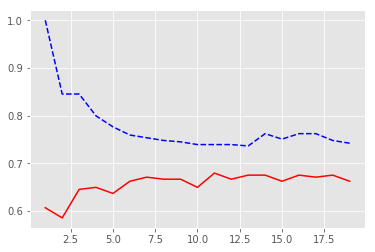

In [175]:
plt.plot(n, train_accuracy, color='b', linestyle='--')
plt.plot(n, test_accuracy, color='r')

### Seems k=11 yields best classification

In [176]:
# Plotting accuracy for KNN=11

knn = KNeighborsClassifier(n_neighbors=11)
# fit the model
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
print(score)

pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'], margins=True)

0.6794871794871795


Actual,No,Yes,All
Predicted,,,
No,17,25,42
Yes,50,142,192
All,67,167,234


### Explanation

Out of '192' people having Liver disease, 142 are predicted correctly, and 50 are False Positivies
Out of '42' people not having Liver disease, 25 are predicted wrongly which is False Negative.

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.40      0.25      0.31        67
         Yes       0.74      0.85      0.79       167

   micro avg       0.68      0.68      0.68       234
   macro avg       0.57      0.55      0.55       234
weighted avg       0.64      0.68      0.65       234



# ROC Curve
X Axis : False Positive Rate, Y Axis : True Positive Rate

In [178]:
y_pred_prob = knn.predict_proba(X_test)

In [179]:
# y_pred_prob is a (N,2) array. N => Number of samples, 2 => Number of classes
# For each sample, its probability to choose class-1, versus class-2.
# for e.g. N=1, P(N=1|c=1) = 1

In [180]:
from sklearn.metrics import roc_curve

In [181]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1], pos_label='Yes')

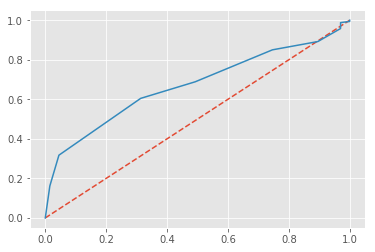

In [182]:
plt.plot([0,1],[0,1],"--")
plt.plot(fpr, tpr)

In [183]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.6719545982661542


### Cross validation

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
grids = {'n_neighbors' : np.arange(1,10)}

In [191]:
knngrid = KNeighborsClassifier()
knngrid_cv = GridSearchCV(knngrid, grids, cv=2)

In [192]:
knngrid_cv.fit(X,y)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [193]:
knngrid_cv.best_score_

0.6861063464837049

In [194]:
knngrid_cv.best_params_

{'n_neighbors': 9}